## **1.) Importing modules and libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, math, cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))
        
print('Done !! ')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Done !! 


## **2.) Loading data and observing it**

In [2]:
labels = pd.read_csv('../input/dog-breed-identification/labels.csv')
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [3]:
labels.breed.nunique()

120

In [4]:
labels.breed.unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [5]:
label_count = labels.breed.value_counts()
print(len(label_count))
print(label_count)
label_count.index
# label_count

120
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed',
       ...
       'otterhound', 'german_shepherd', 'walker_hound', 'tibetan_mastiff',
       'giant_schnauzer', 'golden_retriever', 'brabancon_griffon', 'komondor',
       'eskimo_dog', 'briard'],
      dtype='object', length=120)

<AxesSubplot:>

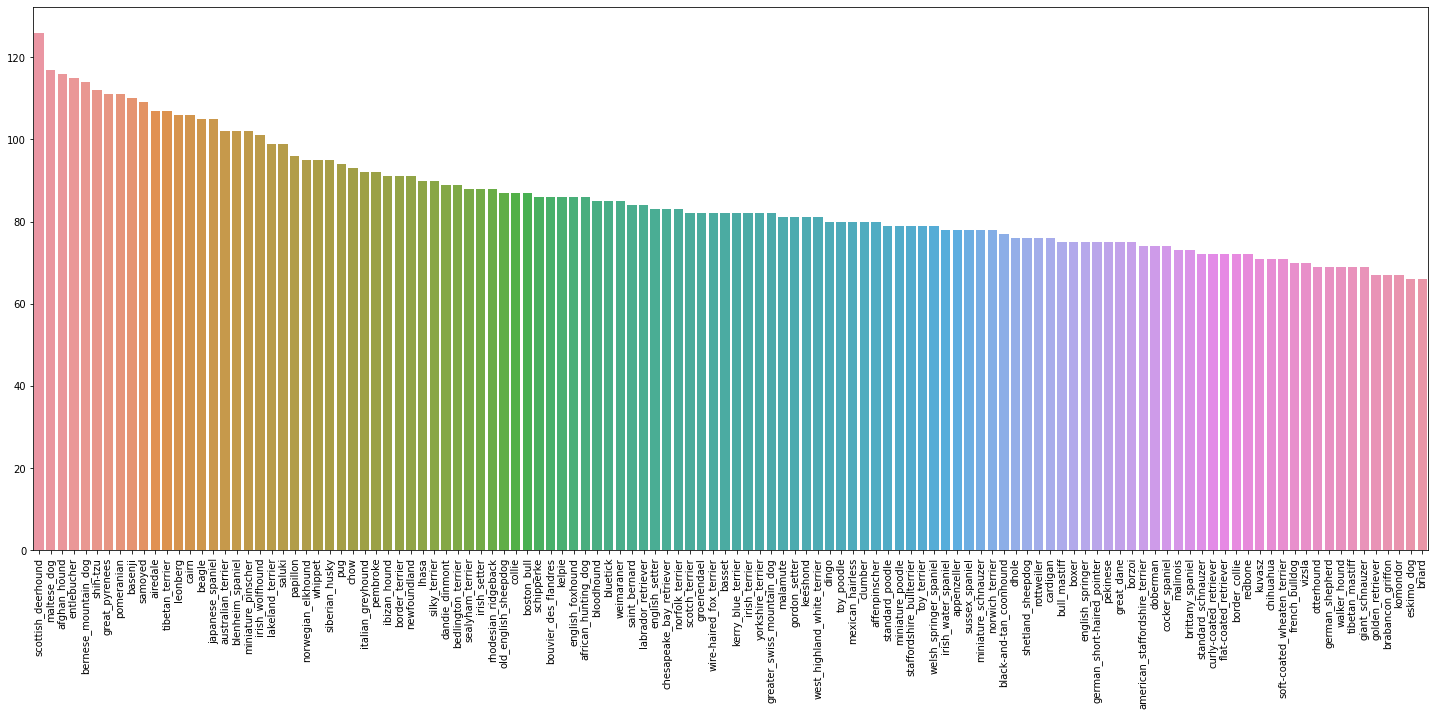

In [6]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(x=label_count.index,y=label_count.values)

In [7]:
sample_submission = pd.read_csv('../input/dog-breed-identification/sample_submission.csv')
sample_submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [8]:
TRAIN_DIR = '../input/dog-breed-identification/train'
TEST_DIR =  '../input/dog-breed-identification/test'
print(type(labels.loc[2133].id))
labels.loc[2133]

<class 'str'>


id       351a08cd2b2fca3a3f57cf4007857231
breed                          schipperke
Name: 2133, dtype: object

In [9]:
labels.id = TRAIN_DIR + '/' + labels.id + '.jpg'
labels.loc[2133].id

'../input/dog-breed-identification/train/351a08cd2b2fca3a3f57cf4007857231.jpg'

In [10]:
labels.loc[2133]

id       ../input/dog-breed-identification/train/351a08...
breed                                           schipperke
Name: 2133, dtype: object

In [11]:
labels.head()

,id,breed
0,../input/dog-breed-identification/train/000bec...,boston_bull
1,../input/dog-breed-identification/train/001513...,dingo
2,../input/dog-breed-identification/train/001cdf...,pekinese
3,../input/dog-breed-identification/train/00214f...,bluetick
4,../input/dog-breed-identification/train/0021f9...,golden_retriever


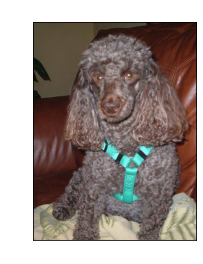

original shape :  (375, 500)


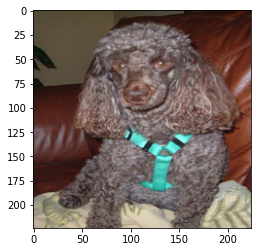

reshaped shape :  (224, 224)


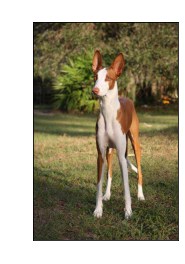

original shape :  (333, 500)


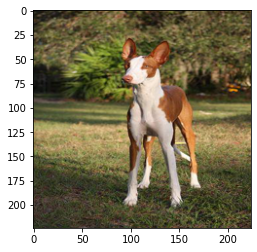

reshaped shape :  (224, 224)


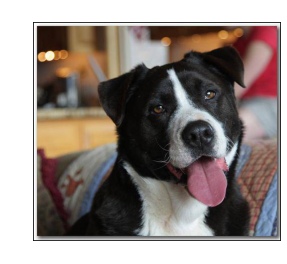

original shape :  (500, 440)


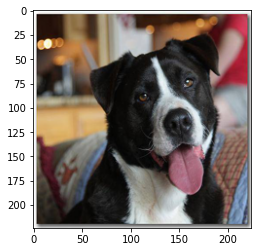

reshaped shape :  (224, 224)


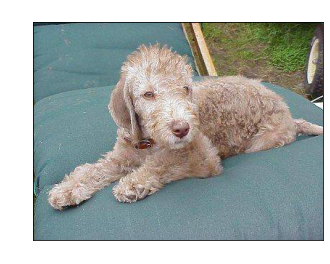

original shape :  (400, 300)


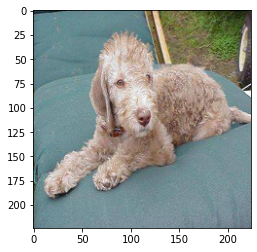

reshaped shape :  (224, 224)


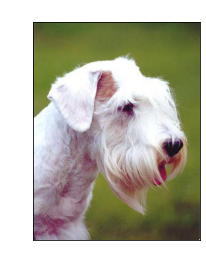

original shape :  (343, 448)


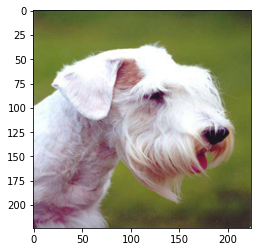

reshaped shape :  (224, 224)


In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from PIL import Image
for i in range(2212,2217):
    plt.title(labels.loc[i].breed,color='w')
    plt.tick_params(axis='x', colors='w')
    plt.tick_params(axis='y', colors='w')
    plt.imshow(Image.open(labels.loc[i].id))
    plt.show()
    print('original shape : ', Image.open(labels.loc[i].id).size)
    plt.imshow(Image.open(labels.loc[i].id).resize((224,224)))
    plt.show()
    print('reshaped shape : ', (224,224))

In [13]:
image.img_to_array(load_img(labels.loc[i].id)).shape

(448, 343, 3)

## **3.) Making Training data**

In [14]:
labels = pd.read_csv('../input/dog-breed-identification/labels.csv')
labels.id = labels.id + '.jpg'

In [15]:
IMAGE_SIZE = (331, 331, 3)

In [28]:
train_df, val_df = train_test_split(labels, test_size=0.1)

train_df.reset_index(drop = True,inplace=True)
val_df.reset_index(drop = True,inplace=True)

train_gen = ImageDataGenerator(rotation_range = 35,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
#                                   rescale = 1./255.,
                                  horizontal_flip = True,
                                  )
val_gen = ImageDataGenerator(
#                                 rescale = 1./255.
                            )

train_data = train_gen.flow_from_dataframe(dataframe = train_df,
                                           directory = TRAIN_DIR,
                                           x_col = 'id', y_col = 'breed',
                                           class_mode = 'categorical',
#                                            shuffle=False
                                           target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]) 
                                          )
val_data = val_gen.flow_from_dataframe(dataframe = val_df,
                                       directory = TRAIN_DIR,
                                       x_col = 'id', y_col = 'breed',
                                       class_mode = 'categorical',
#                                            shuffle=False
                                   target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0])
                                      )

Found 9199 validated image filenames belonging to 120 classes.
Found 1023 validated image filenames belonging to 120 classes.


In [29]:
print(train_data.class_indices)
print(train_data[0][0].shape)
print(train_data[0][1].shape)
train_data[0][1][19].sum()

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

1.0

In [30]:
img_dog = load_img(TRAIN_DIR+'/'+train_df.loc[np.random.randint(0,train_df.shape[0])].at['id'])

img_dog_arr = image.img_to_array(img_dog)
img_dog_arr = img_dog_arr.reshape((1,)+ img_dog_arr.shape)
aug_images_dog = train_gen.flow(img_dog_arr)

aug_images_dog[0].shape

(1, 378, 500, 3)

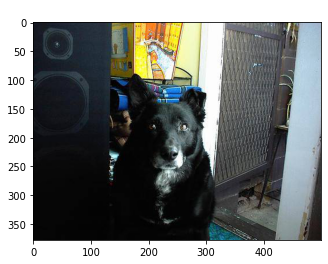

batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)
batch =  (1, 378, 500, 3)


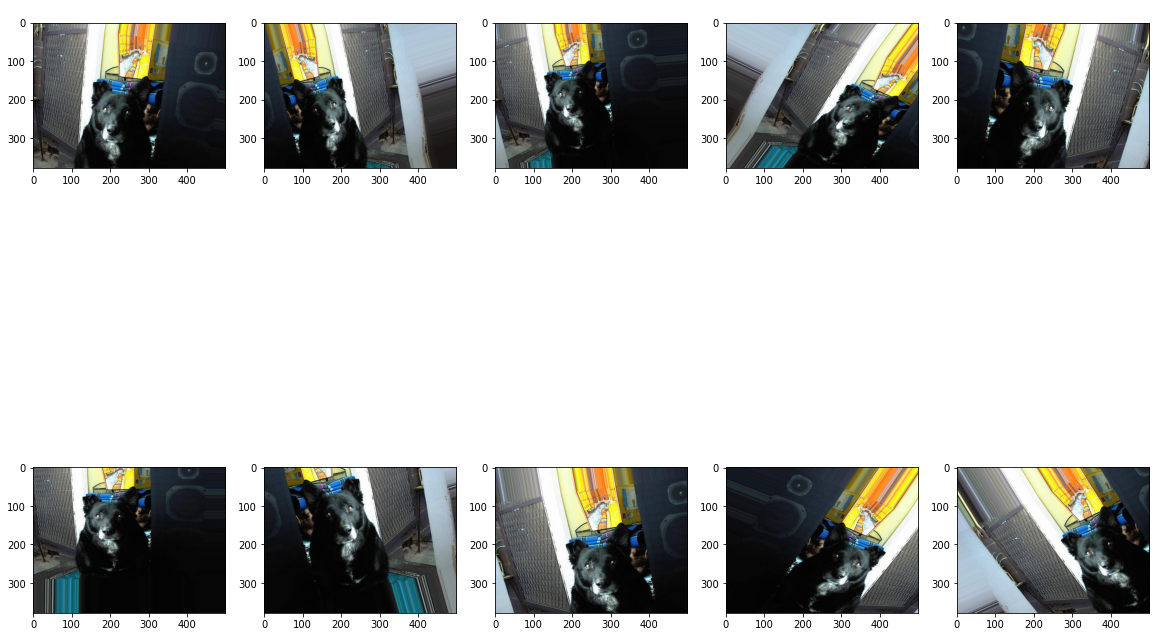

In [31]:
plt.imshow(img_dog)
plt.title("original",color = 'white')
plt.show()
i=1
plt.figure(figsize=(20,15))
for batch in aug_images_dog:
    plt.subplot(2,5,i)
    print("batch = ", batch.shape)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title("augmented",color='w')
#     plt.show()
    i += 1
    if i % 11 == 0:
        break

## **4.) Trying out 1st model => InceptionV3**

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

def get_inception_model():
    pretrained_model = InceptionV3(input_shape = (299,299,3),include_top=False,
                                   weights='imagenet')
#     pretrained_model.load_weights()
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    
#     best_model = keras.models.Sequential()
#     best_model.add(pretrained_model)
#     best_model.add(tfl.Flatten())
#     best_model.add(tfl.Dense(64, activation='relu'))
#     best_model.add(tfl.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
#     best_model.add(tfl.Dropout(0.2))
#     best_model.add(tfl.Dense(120, activation='softmax'))
#     return best_model
    inputs = tfl.Input(shape=(299,299,3))
    x = preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)
#     model2=keras.models.Sequential()
#     model2.add(pretrained_model)

#     model2.add(tfl.GlobalAveragePooling2D())
#     model2.add(tfl.Dense(512,activation='relu'))
#     model2.add(tfl.Dropout(0.2))
#     model2.add(tfl.Dense(120,activation='softmax'))

#     model2.layers[0].trainable=False

#     model2.compile(optimizer='sgd',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy']
#                  )

    return model

In [26]:
inception_model = get_inception_model()
inception_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 299, 299, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098

In [21]:
# inception_model.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy']
#                  )
# history=inception_model.fit(train_data,
# #                    steps_per_epoch=73,
#                    epochs=100,
#                    validation_data=val_data)
# #                    validation_steps=8,
# #                    callbacks=[callback])

In [27]:
inception_model.compile(optimizer=keras.optimizers.Adam(1e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_inception = inception_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

Epoch 1/10
256/256 [==============================] - 195s 751ms/step - loss: 2.8196 - accuracy: 0.4851 - val_loss: 0.9432 - val_accuracy: 0.8469
Epoch 2/10
256/256 [==============================] - 192s 750ms/step - loss: 0.9902 - accuracy: 0.7561 - val_loss: 0.5177 - val_accuracy: 0.8807
Epoch 3/10
256/256 [==============================] - 190s 744ms/step - loss: 0.7526 - accuracy: 0.7925 - val_loss: 0.4462 - val_accuracy: 0.8822
Epoch 4/10
256/256 [==============================] - 190s 742ms/step - loss: 0.6831 - accuracy: 0.7997 - val_loss: 0.4382 - val_accuracy: 0.8660
Epoch 5/10
256/256 [==============================] - 191s 745ms/step - loss: 0.6373 - accuracy: 0.8120 - val_loss: 0.4000 - val_accuracy: 0.8738
Epoch 6/10
256/256 [==============================] - 192s 751ms/step - loss: 0.5926 - accuracy: 0.8238 - val_loss: 0.3889 - val_accuracy: 0.8778
Epoch 7/10
256/256 [==============================] - 191s 746ms/step - loss: 0.5573 - accuracy: 0.8281 - val_loss: 0.3808 -

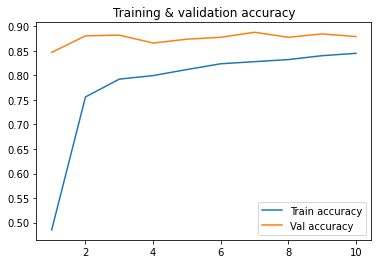

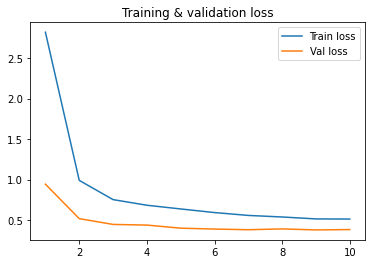

In [28]:
#  dnjjmbbmmnnnmmmmnnnnnnnn
acc = history_inception.history['accuracy']
val_acc = history_inception.history['val_accuracy']
loss = history_inception.history['loss']  
val_loss = history_inception.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [30]:
inception_model.save('dog_breed_inception_model(2).h5')
inception_model.save_weights('dog_breed_inception_model_weights(2).h5')

## **5.) Trying out 2nd model => Xception**

In [31]:
from tensorflow.keras.applications.xception import Xception

def get_xception_model():
    pretrained_model = Xception(input_shape = (299,299,3),include_top=False,
                                   weights='imagenet')
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    inputs = tfl.Input(shape=(299,299,3))
    x = keras.applications.xception.preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [32]:
xception_model = get_xception_model()
xception_model.summary()

83697664/83683744 [==============================] - 2s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
____________________________________________________________

In [33]:
xception_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_xception = xception_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

Epoch 1/10
256/256 [==============================] - 203s 779ms/step - loss: 1.4492 - accuracy: 0.6738 - val_loss: 0.4561 - val_accuracy: 0.8665
Epoch 2/10
256/256 [==============================] - 197s 771ms/step - loss: 0.6401 - accuracy: 0.8101 - val_loss: 0.4082 - val_accuracy: 0.8778
Epoch 3/10
256/256 [==============================] - 195s 761ms/step - loss: 0.5540 - accuracy: 0.8266 - val_loss: 0.4182 - val_accuracy: 0.8714
Epoch 4/10
256/256 [==============================] - 196s 766ms/step - loss: 0.4846 - accuracy: 0.8460 - val_loss: 0.4162 - val_accuracy: 0.8665
Epoch 5/10
256/256 [==============================] - 199s 776ms/step - loss: 0.4612 - accuracy: 0.8539 - val_loss: 0.4038 - val_accuracy: 0.8773
Epoch 6/10
256/256 [==============================] - 196s 766ms/step - loss: 0.4298 - accuracy: 0.8597 - val_loss: 0.4108 - val_accuracy: 0.8719
Epoch 7/10
256/256 [==============================] - 195s 763ms/step - loss: 0.4046 - accuracy: 0.8731 - val_loss: 0.3950 -

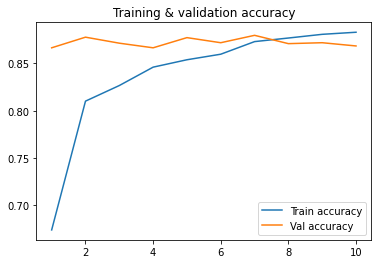

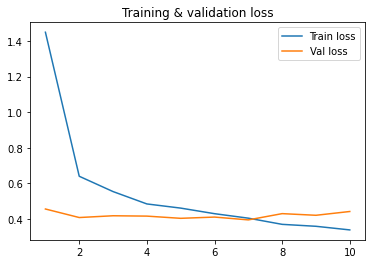

In [34]:
#  dnjjmnnnkkkkmmnnn
acc = history_xception.history['accuracy']
val_acc = history_xception.history['val_accuracy']
loss = history_xception.history['loss']  
val_loss = history_xception.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [35]:
xception_model.save('dog_breed_xception_model.h5')
xception_model.save_weights('dog_breed_xception_model_weight.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## **6.) Trying out 3rd model => Resnet152**

In [39]:
from tensorflow.keras.applications.resnet import ResNet152

def get_resnet152_model():
    pretrained_model = ResNet152(input_shape = (299,299,3),include_top=False,
                                   weights='imagenet')
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    inputs = tfl.Input(shape=(299,299,3))
    x = keras.applications.resnet.preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [40]:
resnet152_model = get_resnet152_model()
resnet152_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 299, 299, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 299, 299, 3)       0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098

In [41]:
resnet152_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_resnet152 = resnet152_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

Epoch 1/10
256/256 [==============================] - 229s 865ms/step - loss: 2.1757 - accuracy: 0.4734 - val_loss: 0.8582 - val_accuracy: 0.7496
Epoch 2/10
256/256 [==============================] - 215s 839ms/step - loss: 0.8993 - accuracy: 0.7346 - val_loss: 0.6760 - val_accuracy: 0.7883
Epoch 3/10
256/256 [==============================] - 214s 835ms/step - loss: 0.7000 - accuracy: 0.7808 - val_loss: 0.6310 - val_accuracy: 0.8088
Epoch 4/10
256/256 [==============================] - 210s 821ms/step - loss: 0.5875 - accuracy: 0.8145 - val_loss: 0.6222 - val_accuracy: 0.8064
Epoch 5/10
256/256 [==============================] - 213s 832ms/step - loss: 0.5198 - accuracy: 0.8321 - val_loss: 0.6321 - val_accuracy: 0.8054
Epoch 6/10
256/256 [==============================] - 213s 830ms/step - loss: 0.4755 - accuracy: 0.8458 - val_loss: 0.6576 - val_accuracy: 0.7961
Epoch 7/10
256/256 [==============================] - 210s 819ms/step - loss: 0.4220 - accuracy: 0.8685 - val_loss: 0.6006 -

In [43]:
fine_tune_epochs = 5
# total_epochs =  initial_epochs + fine_tune_epochs bbbbbnnnnnnnnn

history_resnet152_new = resnet152_model.fit(train_data,
                         epochs=20,
                         initial_epoch=history_resnet152.epoch[-1],
                         validation_data=val_data)

Epoch 10/20
256/256 [==============================] - 212s 828ms/step - loss: 0.2994 - accuracy: 0.8995 - val_loss: 0.6150 - val_accuracy: 0.8254
Epoch 11/20
256/256 [==============================] - 213s 831ms/step - loss: 0.2855 - accuracy: 0.9057 - val_loss: 0.6278 - val_accuracy: 0.8235
Epoch 12/20
256/256 [==============================] - 212s 827ms/step - loss: 0.2822 - accuracy: 0.9066 - val_loss: 0.6220 - val_accuracy: 0.8254
Epoch 13/20
256/256 [==============================] - 214s 834ms/step - loss: 0.2531 - accuracy: 0.9150 - val_loss: 0.6632 - val_accuracy: 0.8142
Epoch 14/20
256/256 [==============================] - 213s 833ms/step - loss: 0.2320 - accuracy: 0.9197 - val_loss: 0.6445 - val_accuracy: 0.8186
Epoch 15/20
256/256 [==============================] - 211s 825ms/step - loss: 0.2413 - accuracy: 0.9186 - val_loss: 0.6995 - val_accuracy: 0.8147
Epoch 16/20
256/256 [==============================] - 212s 826ms/step - loss: 0.2309 - accuracy: 0.9243 - val_loss: 0

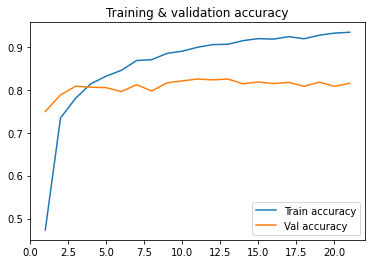

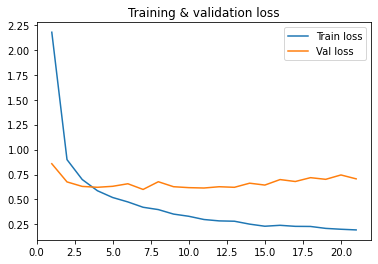

In [45]:
#  dnjjmnnjjjgmmmmcccvvccnnnnnmm   cvvvffffmmbhhhbbbccbbb  
acc = history_resnet152.history['accuracy'] + history_resnet152_new.history['accuracy']
val_acc = history_resnet152.history['val_accuracy'] + history_resnet152_new.history['val_accuracy']
loss = history_resnet152.history['loss']  + history_resnet152_new.history['loss']
val_loss = history_resnet152.history['val_loss'] + history_resnet152_new.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
# plresnet152

In [46]:
resnet152_model.save('dog_breed_resnet152_model.h5')
resnet152_model.save_weights('dog_breed_resnet152_model_weight.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [36]:
m = keras.applications.resnet.ResNet152(
    include_top=False, weights='imagenet',
    input_shape=(299,299,3)
)
m.summary()

234708992/234698864 [==============================] - 3s 0us/step
Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
_______________________

In [38]:
m = keras.applications.resnet_v2.ResNet152V2(
    include_top=False, weights='imagenet',
    input_shape=(299,299,3)
)
m.summary()

234561536/234545216 [==============================] - 3s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
_____________________

## **7.) Trying out 4th model => NasNet**

In [36]:
from tensorflow.keras.applications.nasnet import NASNetLarge

def get_nasnet_model():
    pretrained_model = NASNetLarge(input_shape = IMAGE_SIZE,include_top=False,
                                   weights='imagenet')
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    inputs = tfl.Input(shape=IMAGE_SIZE)
    x = keras.applications.nasnet.preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [37]:
nasnet_model = get_nasnet_model()
nasnet_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 331, 331, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 331, 331, 3)       0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 4032)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              4129

In [38]:
nasnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_nasnet = nasnet_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

2022-02-18 14:56:44.951065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-02-18 14:57:06.939976: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


288/288 [==============================] - 414s 1s/step - loss: 0.7913 - accuracy: 0.8245 - val_loss: 0.2122 - val_accuracy: 0.9394
Epoch 2/10
288/288 [==============================] - 341s 1s/step - loss: 0.3704 - accuracy: 0.8959 - val_loss: 0.2207 - val_accuracy: 0.9345
Epoch 3/10
288/288 [==============================] - 340s 1s/step - loss: 0.3261 - accuracy: 0.9021 - val_loss: 0.2325 - val_accuracy: 0.9345
Epoch 4/10
288/288 [==============================] - 337s 1s/step - loss: 0.3051 - accuracy: 0.9038 - val_loss: 0.2260 - val_accuracy: 0.9316
Epoch 5/10
288/288 [==============================] - 337s 1s/step - loss: 0.2725 - accuracy: 0.9115 - val_loss: 0.2278 - val_accuracy: 0.9326
Epoch 6/10
288/288 [==============================] - 336s 1s/step - loss: 0.2571 - accuracy: 0.9167 - val_loss: 0.2297 - val_accuracy: 0.9267
Epoch 7/10
288/288 [==============================] - 337s 1s/step - loss: 0.2533 - accuracy: 0.9208 - val_loss: 0.2538 - val_accuracy: 0.9326
Epoch 8/10

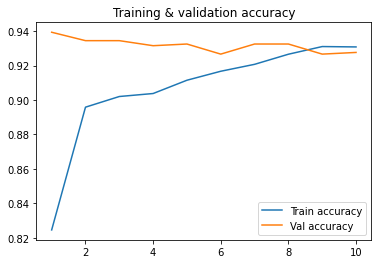

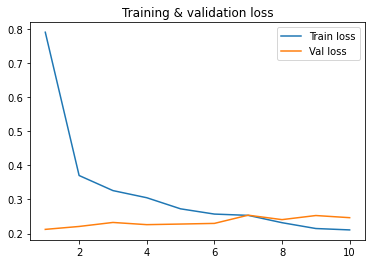

In [39]:
#  dnjjmnkkddzcccddd
acc = history_nasnet.history['accuracy']
val_acc = history_nasnet.history['val_accuracy']
loss = history_nasnet.history['loss']  
val_loss = history_nasnet.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [40]:
nasnet_model.save('dog_breed_nasnet_model.h5')
nasnet_model.save_weights('dog_breed_nasnet_model_weight.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## **8.) Final submission**

> As you can see, we have clear winner, NasNet Neural Network with highest training and validation accuracy.
Hence, we will make submission using this model.

In [41]:
submission = pd.read_csv('../input/dog-breed-identification/sample_submission.csv')
submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [47]:
test_df = submission.copy()
test_df = pd.DataFrame(test_df.id)
# test_df['breed'] = ['affenpinscher']*test_df.shape[0]
test_df.id = test_df.id + '.jpg'
display(test_df)

,id
0,000621fb3cbb32d8935728e48679680e.jpg
1,00102ee9d8eb90812350685311fe5890.jpg
2,0012a730dfa437f5f3613fb75efcd4ce.jpg
3,001510bc8570bbeee98c8d80c8a95ec1.jpg
4,001a5f3114548acdefa3d4da05474c2e.jpg
...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8.jpg
10353,fff1ec9e6e413275984966f745a313b0.jpg
10354,fff74b59b758bbbf13a5793182a9bbe4.jpg
10355,fff7d50d848e8014ac1e9172dc6762a3.jpg


In [51]:
test_gen = ImageDataGenerator()

test_data = test_gen.flow_from_dataframe(dataframe = test_df,
                                           directory = TEST_DIR,
                                           x_col = 'id', y_col = None,
                                           class_mode =None,
                                           shuffle=False,
                                           target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]) 
                                          )

Found 10357 validated image filenames.


In [52]:
pred = nasnet_model.predict(test_data)
pred

array([[1.1834517e-04, 2.7393551e-05, 1.9082318e-05, ..., 6.4615715e-06,
        2.3876109e-05, 1.1359223e-05],
       [1.4242733e-06, 1.1286835e-06, 5.5574054e-07, ..., 9.0785113e-07,
        5.4894522e-06, 2.9194994e-06],
       [3.0722783e-06, 2.5250709e-05, 9.7397657e-05, ..., 8.2113584e-06,
        2.7812557e-06, 2.5862360e-05],
       ...,
       [1.7435475e-05, 3.8797980e-06, 2.1087674e-03, ..., 5.6971553e-06,
        1.2691086e-05, 2.7582980e-06],
       [3.2628846e-05, 2.1703545e-06, 4.2682586e-06, ..., 1.3411164e-06,
        1.4841862e-06, 3.0275087e-06],
       [1.4831928e-06, 1.3870558e-04, 3.6102891e-05, ..., 6.4961752e-04,
        7.9422043e-06, 4.6914452e-06]], dtype=float32)

In [53]:
pred.shape

(10357, 120)

In [57]:
submission.iloc[:,1:] = pred
submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,1.183452e-04,2.739355e-05,1.908232e-05,2.742432e-05,1.777101e-05,3.702927e-05,2.370463e-05,7.140401e-06,1.315831e-05,...,1.183484e-04,1.167294e-05,9.388217e-06,1.527452e-05,0.000002,1.484472e-05,3.660357e-06,6.461572e-06,2.387611e-05,1.135922e-05
1,00102ee9d8eb90812350685311fe5890,1.424273e-06,1.128683e-06,5.557405e-07,3.432611e-06,4.749393e-06,3.148357e-05,6.181093e-06,9.071329e-07,4.657523e-06,...,8.230489e-06,9.849182e-07,7.342515e-07,5.346501e-06,0.000003,3.280548e-06,4.379997e-06,9.078511e-07,5.489452e-06,2.919499e-06
2,0012a730dfa437f5f3613fb75efcd4ce,3.072278e-06,2.525071e-05,9.739766e-05,6.990996e-06,1.411228e-05,6.366015e-05,6.022858e-06,9.508792e-07,6.782655e-06,...,3.388639e-06,9.764891e-06,2.102422e-05,5.148237e-05,0.000073,8.960332e-06,9.638767e-07,8.211358e-06,2.781256e-06,2.586236e-05
3,001510bc8570bbeee98c8d80c8a95ec1,1.595088e-05,2.774362e-06,1.068458e-06,5.440598e-07,1.956455e-07,1.414408e-06,1.899137e-07,2.520857e-07,3.041520e-05,...,4.120281e-07,3.455334e-07,5.646366e-06,4.474190e-06,0.000003,1.776938e-06,7.710696e-07,1.763427e-05,1.853556e-07,2.065030e-07
4,001a5f3114548acdefa3d4da05474c2e,1.459941e-03,5.683743e-06,8.736054e-06,2.601002e-05,1.998144e-06,4.922039e-05,1.366223e-05,1.592926e-06,1.348531e-05,...,8.268263e-05,1.692123e-06,8.246641e-06,1.306281e-05,0.000006,1.057102e-06,4.169384e-07,5.969010e-06,2.299495e-05,4.662813e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,3.138244e-05,2.229707e-03,3.308185e-05,3.620491e-05,6.543370e-05,1.115960e-04,1.715626e-04,6.189032e-05,1.599939e-04,...,4.015200e-03,3.205752e-05,5.320631e-05,8.324565e-04,0.000027,1.368624e-04,2.508094e-05,1.063969e-04,2.559336e-05,4.909154e-05
10353,fff1ec9e6e413275984966f745a313b0,1.558438e-07,1.914733e-08,1.108871e-07,1.083358e-07,4.056879e-07,6.297967e-08,3.929593e-08,1.998856e-09,6.679340e-08,...,3.605600e-07,2.637297e-09,6.949452e-07,4.857094e-08,0.999956,3.439403e-08,1.831897e-08,1.490998e-07,3.489750e-08,1.097257e-07
10354,fff74b59b758bbbf13a5793182a9bbe4,1.743548e-05,3.879798e-06,2.108767e-03,5.309340e-06,5.207905e-06,1.149855e-05,2.120712e-05,2.769358e-06,3.151244e-06,...,2.878384e-05,6.883173e-06,9.754634e-07,9.731873e-06,0.000002,7.212078e-06,2.611432e-06,5.697155e-06,1.269109e-05,2.758298e-06
10355,fff7d50d848e8014ac1e9172dc6762a3,3.262885e-05,2.170354e-06,4.268259e-06,2.468708e-06,3.189445e-06,2.391198e-06,6.317180e-06,2.730283e-07,3.667795e-06,...,1.477778e-05,3.352686e-07,2.618297e-06,5.773246e-06,0.000002,9.166891e-07,4.481891e-07,1.341116e-06,1.484186e-06,3.027509e-06


In [58]:
submission.to_csv('dog_breed_submission_nasnet.csv',index = False)